# **Machine Learning and Forecasting: Seminar 1**

## Question 1: 
Read the dataset Lecture_1_Regression_Toy_Data.csv into Python. Answer the following questions.

1. Show the names of all the variables in the dataset and the first 5 observations.
2. Write Python code to create a Q-Q plot and check whether $y$ follows the normal distribution. Interpret the Q-Q plot.
3. Write Python code to perform a statistical test for goodness-of-fit, e.g., the Jarque Bera test or the omnibus test, and check whether $y$ follows the normal distribution.
4. Build a linear regression model on the dataset, with $y$ being the dependent variable and the others being the independent variables.
5. Carefully check the results of the F-test and the t-tests, respectively? If not, re-build a model until the regression model satisfies the requirements regarding the F-test and the t-test, respectively.
6. What is your final conclusion from the above exercise?

In [ ]:
import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.stattools import jarque_bera, omni_normtest
import matplotlib.pyplot as plt
import scipy.stats as stats

### 1.1 Read data in, look at variables and look at first 5 rows

In [22]:
Regression_Toy_Data_df = pd.read_csv("Datasets/Lecture_1_Regression_Toy_Data.csv")
Regression_Toy_Data_df.info()
display(Regression_Toy_Data_df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1000 non-null   float64
 1   X2      1000 non-null   float64
 2   X3      1000 non-null   float64
 3   X4      1000 non-null   float64
 4   X5      1000 non-null   float64
 5   X6      1000 non-null   float64
 6   y       1000 non-null   float64
dtypes: float64(7)
memory usage: 54.8 KB


,X1,X2,X3,X4,X5,X6,y
0,0.496714,-0.011269,0.647689,1.435496,-0.234153,-0.234137,2.776992
1,1.579213,0.929790,-0.469474,0.441357,-0.463418,-0.465730,3.744257
2,0.241962,-1.482232,-1.724918,-0.678551,-1.012831,0.314247,3.112798
3,-0.908024,-1.311448,1.465649,-0.056634,0.067528,-1.424748,3.916046
4,-0.544383,-0.020138,-1.150994,0.223029,-0.600639,-0.291694,4.554698


### 1.2 Create a Q-Q plot

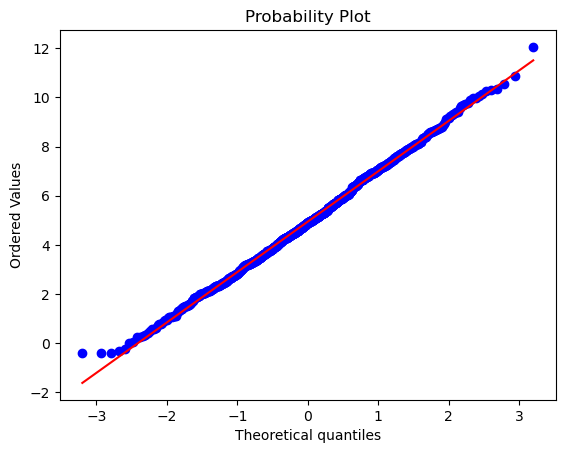

In [31]:
stats.probplot(Regression_Toy_Data_df["y"], dist="norm", plot=plt)
plt.show()

y approximately follows a normal distribution (except for a few variables at the bottom left).

### 1.3 Perform a Jarque Bera test to test whether y follows a normal distribution, output is in (JB_statistic, p_value, skewness, kurtosis)

In [26]:
jbTest = jarque_bera(Regression_Toy_Data_df["y"])
jbTest

(np.float64(3.4793473805090183),
 np.float64(0.17557768397980214),
 np.float64(0.1184901470718176),
 np.float64(2.8346377391306814))

Normal as p_value is greater than 0.05.

In [28]:
# Perform an omni test to test whether y follows a normal distribution
omniTest = omni_normtest(Regression_Toy_Data_df["y"])
omniTest

NormaltestResult(statistic=np.float64(3.4826086269059715), pvalue=np.float64(0.17529161623290834))

Normal as p_value is greater than 0.05.

### 1.4 Build a linear regression model with y being the dependent and the others being the independent

In [49]:
# Iteration 1
# define X and y
y = Regression_Toy_Data_df["y"]
X = Regression_Toy_Data_df.drop(columns=["y"]) 
X = sm.add_constant(X)

#to fit regression model
model = sm.OLS(y, X).fit() #where y is the dependent variable and X_train_data is the dependent variables

#to view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7149
Date:                Mon, 12 Jan 2026   Prob (F-statistic):              0.638
Time:                        13:24:41   Log-Likelihood:                -2134.0
No. Observations:                1000   AIC:                             4282.
Df Residuals:                     993   BIC:                             4316.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9446      0.065     75.974      0.0

### 1.5 F-statistic approximately 1 so fail to reject the null hypothesis, need to reiterate.

In [55]:
# Iteration 2
# define X and y, remove variable with highest p value from t-test
y = Regression_Toy_Data_df["y"]
X = Regression_Toy_Data_df.drop(columns=["y", "X5"]) 
X = sm.add_constant(X)

#to fit regression model
model = sm.OLS(y, X).fit() #where y is the dependent variable and X_train_data is the dependent variables

#to view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8587
Date:                Mon, 12 Jan 2026   Prob (F-statistic):              0.508
Time:                        13:25:34   Log-Likelihood:                -2134.0
No. Observations:                1000   AIC:                             4280.
Df Residuals:                     994   BIC:                             4309.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9447      0.065     76.112      0.0

In [56]:
# Iteration 3
# define X and y, remove variable with highest p value from t-test
y = Regression_Toy_Data_df["y"]
X = Regression_Toy_Data_df.drop(columns=["y", "X5", "X1"]) 
X = sm.add_constant(X)

#to fit regression model
model = sm.OLS(y, X).fit() #where y is the dependent variable and X_train_data is the dependent variables

#to view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.060
Date:                Mon, 12 Jan 2026   Prob (F-statistic):              0.375
Time:                        13:25:47   Log-Likelihood:                -2134.0
No. Observations:                1000   AIC:                             4278.
Df Residuals:                     995   BIC:                             4303.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9449      0.065     76.162      0.0

In [57]:
# Iteration 4
# define X and y, remove variable with highest p value from t-test
y = Regression_Toy_Data_df["y"]
X = Regression_Toy_Data_df.drop(columns=["y", "X5", "X2", "X1"]) 
X = sm.add_constant(X)

#to fit regression model
model = sm.OLS(y, X).fit() #where y is the dependent variable and X_train_data is the dependent variables

#to view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.374
Date:                Mon, 12 Jan 2026   Prob (F-statistic):              0.249
Time:                        13:26:03   Log-Likelihood:                -2134.1
No. Observations:                1000   AIC:                             4276.
Df Residuals:                     996   BIC:                             4296.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9448      0.065     76.195      0.0

In [58]:
# Iteration 5
# define X and y, remove variable with highest p value from t-test
y = Regression_Toy_Data_df["y"]
X = Regression_Toy_Data_df.drop(columns=["y", "X5", "X2", "X1", "X6"]) 
X = sm.add_constant(X)

#to fit regression model
model = sm.OLS(y, X).fit() #where y is the dependent variable and X_train_data is the dependent variables

#to view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.977
Date:                Mon, 12 Jan 2026   Prob (F-statistic):              0.139
Time:                        13:26:14   Log-Likelihood:                -2134.2
No. Observations:                1000   AIC:                             4274.
Df Residuals:                     997   BIC:                             4289.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9435      0.065     76.296      0.0

In [59]:
# Iteration 6
# define X and y, remove variable with highest p value from t-test
y = Regression_Toy_Data_df["y"]
X = Regression_Toy_Data_df.drop(columns=["y", "X5", "X2", "X1", "X6", "X4"]) 
X = sm.add_constant(X)

#to fit regression model
model = sm.OLS(y, X).fit() #where y is the dependent variable and X_train_data is the dependent variables

#to view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.179
Date:                Mon, 12 Jan 2026   Prob (F-statistic):             0.0749
Time:                        13:26:28   Log-Likelihood:                -2134.6
No. Observations:                1000   AIC:                             4273.
Df Residuals:                     998   BIC:                             4283.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9453      0.065     76.371      0.0

### 1.6 Conclusion: No model with satisfy both the t-test and the f-test, need different variables or new instances. Model is insignificant.

## Question 2: 
It is known that Miles per gallon (MPG) and CO$_2$ emissions are inversely related: higher MPG means lower fuel consumption, which directly results in fewer CO$_2$ emissions, making the car more economical and environmentally friendly. Read the dataset Miles_Per_Gallon.csv---which was downloaded from https://archive.ics.uci.edu/dataset/9/auto+mpg ---into Python. Answer the following questions.

1. Show the names of all the variables in the dataset and the first 5 observations.
2. Build a linear regression model on the dataset, with $y$ being the dependent variable and the others being the independent variables. Check the model carefully. If needed, rebuild a model until the results of the F-test and the t-tests are significant. Record the values of the $R^2$, the AIC and the BIC, respectively.
3. Find the residuals of the final model. Write Python code to create a Q-Q plot and check whether the residuals follow the normal distribution. Interpret the Q-Q plot.
4. Write Python code to perform a goodness-of-fit test using the Jarque_Bera test and check whether the residuals follows the normal distribution.
5. Interpret each coefficient of the last model you have built.
6. Compare the values of the $R^2$, the AIC and the BIC. Find the optimal model among the models, which are called candidate models.
7. Show the confidence intervals of the coefficients in the final model and then the confidence intervals of all observations in the dataset.
8. Show the prediction intervals of the observations in the dataset.







### 2.1 Read in the data and observe the variables

In [38]:
Auto_MPG_Dataset_df = pd.read_csv("Datasets/Auto_MPG_Dataset.csv")

In [40]:
Auto_MPG_Dataset_df.info()
display(Auto_MPG_Dataset_df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Miles_Per_Gallon  378 non-null    float64
 1   Cylinders         378 non-null    int64  
 2   Displacement      378 non-null    float64
 3   Horsepower        378 non-null    int64  
 4   Weight            378 non-null    int64  
 5   Acceleration      378 non-null    float64
 6   Model_Year        378 non-null    int64  
 7   Origin            378 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 23.8 KB


,Miles_Per_Gallon,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
0,9.0,8,304.0,193,4732,18.5,70,1
1,10.0,8,360.0,215,4615,14.0,70,1
2,10.0,8,307.0,200,4376,15.0,70,1
3,11.0,8,318.0,210,4382,13.5,70,1
4,11.0,8,429.0,208,4633,11.0,72,1


### 2.2 Build a linear regression model with Miles_Per_Gallon being the dependent and the others being the independent

In [60]:
# Iteration 1
# define X and y
y = Auto_MPG_Dataset_df["Miles_Per_Gallon"]
X = Auto_MPG_Dataset_df.drop(columns=["Miles_Per_Gallon"])
X = sm.add_constant(X)

#to fit regression model
model = sm.OLS(y, X).fit() #where y is the dependent variable and X_train_data is the dependent variables

#to view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Miles_Per_Gallon   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     238.2
Date:                Mon, 12 Jan 2026   Prob (F-statistic):          7.53e-133
Time:                        13:26:57   Log-Likelihood:                -991.91
No. Observations:                 378   AIC:                             2000.
Df Residuals:                     370   BIC:                             2031.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -20.2657      4.915     -4.123   

In [61]:
# Iteration 2 remove acceleration as p-value > 0.05
# define X and y
y = Auto_MPG_Dataset_df["Miles_Per_Gallon"]
X = Auto_MPG_Dataset_df.drop(columns=["Miles_Per_Gallon", "Acceleration"])
X = sm.add_constant(X) 

#to fit regression model
model = sm.OLS(y, X).fit() #where y is the dependent variable and X_train_data is the dependent variables

#to view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Miles_Per_Gallon   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     277.2
Date:                Mon, 12 Jan 2026   Prob (F-statistic):          9.58e-134
Time:                        13:27:02   Log-Likelihood:                -992.73
No. Observations:                 378   AIC:                             1999.
Df Residuals:                     371   BIC:                             2027.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.5713      4.432     -3.965   

In [62]:
# Iteration 3 remove cylinders as p-value > 0.05
# define X and y
y = Auto_MPG_Dataset_df["Miles_Per_Gallon"]
X = Auto_MPG_Dataset_df.drop(columns=["Miles_Per_Gallon", "Acceleration", "Cylinders"])
X = sm.add_constant(X) 

#to fit regression model
model = sm.OLS(y, X).fit() #where y is the dependent variable and X_train_data is the dependent variables

#to view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Miles_Per_Gallon   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     332.5
Date:                Mon, 12 Jan 2026   Prob (F-statistic):          7.89e-135
Time:                        13:27:09   Log-Likelihood:                -993.19
No. Observations:                 378   AIC:                             1998.
Df Residuals:                     372   BIC:                             2022.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.2857      4.368     -4.186   

In [63]:
# Iteration 4 remove displacement as p-value > 0.05
# define X and y
y = Auto_MPG_Dataset_df["Miles_Per_Gallon"]
X = Auto_MPG_Dataset_df.drop(columns=["Miles_Per_Gallon", "Acceleration", "Cylinders", "Displacement"]) 
X = sm.add_constant(X)

#to fit regression model
model = sm.OLS(y, X).fit() #where y is the dependent variable and X_train_data is the dependent variables

#to view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Miles_Per_Gallon   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     413.8
Date:                Mon, 12 Jan 2026   Prob (F-statistic):          1.08e-135
Time:                        13:27:17   Log-Likelihood:                -994.30
No. Observations:                 378   AIC:                             1999.
Df Residuals:                     373   BIC:                             2018.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.8599      4.358     -4.328      0.0

In [64]:
# Iteration 5 remove horsepower as p-value > 0.05
# define X and y
y = Auto_MPG_Dataset_df["Miles_Per_Gallon"]
X = Auto_MPG_Dataset_df.drop(columns=["Miles_Per_Gallon", "Acceleration", "Cylinders", "Displacement", "Horsepower"]) 
X = sm.add_constant(X)

#to fit regression model
model = sm.OLS(y, X).fit() #where y is the dependent variable and X_train_data is the dependent variables

#to view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Miles_Per_Gallon   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     548.3
Date:                Mon, 12 Jan 2026   Prob (F-statistic):          1.62e-136
Time:                        13:27:57   Log-Likelihood:                -995.66
No. Observations:                 378   AIC:                             1999.
Df Residuals:                     374   BIC:                             2015.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.2026      4.290     -4.709      0.0

### 2.3 Find residuals of the final model

                    0          1
const      -28.638116 -11.767159
Weight      -0.006612  -0.005590
Model_Year   0.686479   0.890595
Origin       0.636475   1.675437


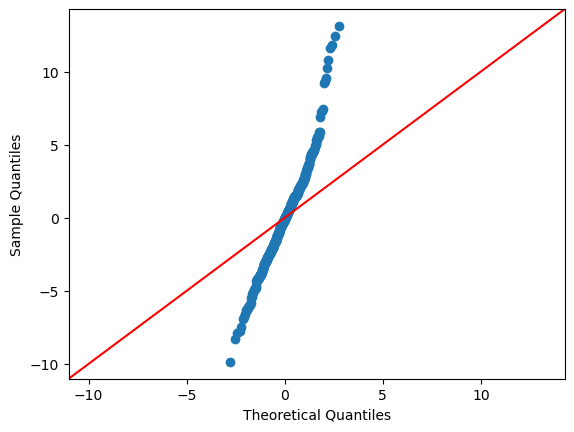

In [65]:
#to retrieve the residuals
residuals = model.resid

#to create a QQ plot to check with the residuals is normally distributed.
fig = sm.qqplot(residuals, line='45')

# to output confidence intervals for the model coefficients
conf_intervals = model.conf_int()
print(conf_intervals)

The residuals do not follow a normal distribution.

### 2.4 Perform a Jarque Bera test to test whether residuals follows a normal distribution, output is in (JB_statistic, p_value, skewness, kurtosis)

In [66]:
jbTest = jarque_bera(residuals)
jbTest

(np.float64(63.14582272036965),
 np.float64(1.9411487591749272e-14),
 np.float64(0.5708959995806098),
 np.float64(4.644861579608364))

Not normal as p_value is less than 0.05.

### 2.5 Model interpretation:
- A car of 0 weight, 0 model year and 0 origin as a mpg of -20 (this is obviously impossible but the year will never be earlier than before caras are made and the weight will have a positive lower limit too).
- Increasing model weight by 1kg decreases the mpg by -0.0061.
- Increasing model year by 1 increases the mpg by 0.7885.
- Increasing origin by 1 increases the mpg by 1.1560.

### 2.6 Model performance
The AIC, BIC and R^2 scores decrease as the model becomes more significant, therefore high performance =/ high significance. Known as overfitting.

### 2.7/2.8 Confidence Intervals

In [69]:
# to produce prediction results
pred = model.get_prediction(X)
pred_summary = pred.summary_frame(alpha=0.05)  # 95% confidence intervals

# to extract confidence intervals
ci_lower = pred_summary['mean_ci_lower']
ci_upper = pred_summary['mean_ci_upper']

# to extract prediction intervals
pi_lower = pred_summary['obs_ci_lower']
pi_upper = pred_summary['obs_ci_upper']

In [70]:
pred_summary

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,7.279692,0.470551,6.354435,8.204948,0.552741,14.006643
1,7.993540,0.452182,7.104401,8.882679,1.271462,14.715618
2,9.451742,0.419036,8.627780,10.275705,2.737974,16.165511
3,9.415135,0.419788,8.589694,10.240575,2.701185,16.129085
4,9.460790,0.414630,8.645491,10.276089,2.748080,16.173501
...,...,...,...,...,...,...
373,30.945750,0.264240,30.426167,31.465333,24.262507,37.628993
374,33.773583,0.343028,33.099077,34.448088,27.076514,40.470651
375,32.471066,0.284127,31.912380,33.029753,25.784670,39.157463
376,35.060820,0.377475,34.318580,35.803060,28.356591,41.765049



## Wrap-up
- Builld a linear regression model with a significant F-Test and significant t-tests;
- Understand the difference between the $R^2$ and the adjusted $R^2$;
- Compare the performance measures such as AIC and adjusted $R^2$ among your candidate models and the select the optimal model;
- Interpret the coefficients of your final model;

## Preparation for the Next Lecture
- To review the assumptions of multiple linear regression models.